#AdaLine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##a.

In [ ]:
mean1a = [1, 1]
cov1a = [[0.3, 0], [0, 0.3]]
x1a, y1a = np.random.multivariate_normal(mean1a, cov1a, 100).T

In [ ]:
mean2a = [-1, -1]
cov2a = [[0.3, 0], [0, 0.3]]
x2a, y2a = np.random.multivariate_normal(mean2a, cov2a, 100).T

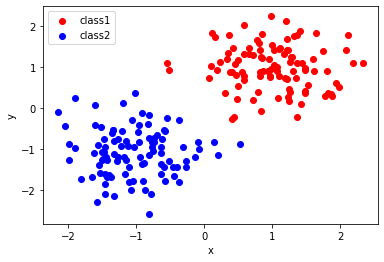

In [ ]:
plt.scatter(x1a, y1a, color='r', label='class1')
plt.scatter(x2a, y2a, color='b', label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Class one:1, Class 2:-1
t1a = np.ones_like(x1a)
t2a = np.ones_like(x2a)*-1

In [ ]:
Xa = np.append(x1a, x2a)
ya = np.append(y1a, y2a)
t_a = np.append(t1a, t2a)

t_a.shape

(200,)

In [ ]:
data_a = np.stack((Xa, ya), axis=-1)
data_a.shape

(200, 2)

##b.

In [ ]:
mean1b = [0, 0]
cov1b = [[0.6, 0], [0, 0.6]]
x1b, y1b = np.random.multivariate_normal(mean1b, cov1b, 100).T

mean2b = [2, 2]
cov2b = [[0.8, 0], [0, 0.8]]
x2b, y2b = np.random.multivariate_normal(mean2b, cov2b, 20).T

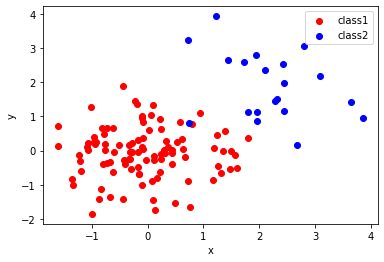

In [ ]:
plt.scatter(x1b, y1b, color='r', label='class1')
plt.scatter(x2b, y2b, color='b', label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Class one:1, Class 2:-1
t1b = np.ones_like(x1b)
t2b = np.ones_like(x2b)*-1

In [ ]:
Xb = np.append(x1b, x2b)
yb = np.append(y1b, y2b)
t_b = np.append(t1b, t2b)

t_b.shape

(120,)

In [ ]:
data_b = np.stack((Xb, yb), axis=-1)

data_b.shape

(120, 2)

#AdaLine

In [ ]:
def initialize_weights(X):
  w = np.random.normal(loc=0, scale=0.01, size=1+X.shape[1])
  
  return w

In [ ]:
def net(X, w):
  '''
  w[1:] represents weight terms and w[0] is bias term
  '''
  return np.dot(X, w[1:]) + w[0]

In [ ]:
def predict(X, w):

  return np.where(net(X, w)>=0, 1, -1)

In [ ]:
def fit(X, t, lr, num_iter):
  err = []
  w = initialize_weights(X)
  for i in range(num_iter):
    nett = net(X, w)
    error = 1/2 * (t - nett)**2
    w[0] += lr * (t - nett).sum()
    w[1:] += lr * (X.T @ (t - nett))
    err.append(error.sum()/len(t)) 

  return w, err

##a.

In [ ]:
lr = 0.0001
num_iter = 100

w_a, err_a = fit(data_a, t_a, lr, num_iter)

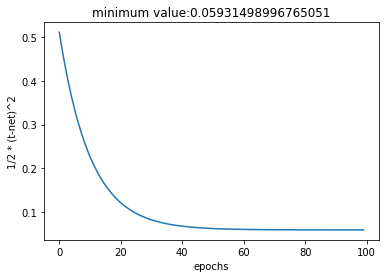

In [ ]:
plt.plot(err_a)
plt.title(f'minimum value:{min(err_a)}')
plt.xlabel('epochs')
plt.ylabel('1/2 * (t-net)^2');

In [ ]:
b_a = w_a[0]
w1_a = w_a[1]
w2_a = w_a[2]

In [ ]:
c_a = -b_a/w2_a
m_a = -w1_a/w2_a
xd_a = np.array([-2.5, 3])
yd_a = m_a*xd_a + c_a

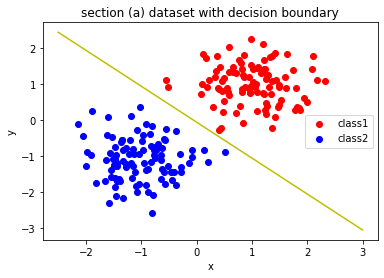

In [ ]:
plt.scatter(x1a, y1a, color='r', label='class1')
plt.scatter(x2a, y2a, color='b', label='class2')
plt.plot(xd_a, yd_a, c='y')
plt.title('section (a) dataset with decision boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# b.

In [ ]:
w_b, err_b = fit(data_b, t_b, lr, num_iter=350)

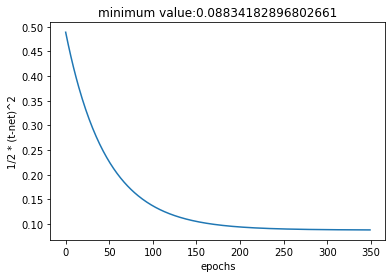

In [ ]:
plt.plot(err_b)
plt.title(f'minimum value:{min(err_b)}')
plt.xlabel('epochs')
plt.ylabel('1/2 * (t-net)^2');

In [ ]:
b_b = w_b[0]
w1_b = w_b[1]
w2_b = w_b[2]

c_b = -b_b/w2_b
m_b = -w1_b/w2_b
xd_b = np.array([-2.0, 4.5])
yd_b = m_b*xd_b + c_b

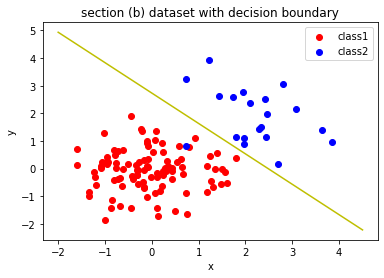

In [ ]:
plt.scatter(x1b, y1b, color='r', label='class1')
plt.scatter(x2b, y2b, color='b', label='class2')
plt.plot(xd_b, yd_b, c='y')
plt.title('section (b) dataset with decision boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()